## Titanic survival prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.base import BaseEstimator
from scipy.stats import chi2_contingency, ttest_ind
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Loading and inspecting data

In [2]:
df = pd.read_csv("titanic_prediction_data/titanic.csv")

<h3>Titanic Dataset Features</h3>
	<p>The Titanic dataset contains information about the passengers aboard the Titanic, including their demographic and ticket information, as well as whether they survived or not. The following are the features included in the dataset:</p>
	<ul>
		<li><b>PassengerId:</b> a unique identifier for each passenger</li>
		<li><b>Survived:</b> whether the passenger survived (1) or not (0)</li>
		<li><b>Pclass:</b> the passenger's ticket class (1st, 2nd, or 3rd)</li>
		<li><b>Name:</b> the passenger's name</li>
		<li><b>Sex:</b> the passenger's sex (male or female)</li>
		<li><b>Age:</b> the passenger's age in years</li>
		<li><b>SibSp:</b> the number of siblings/spouses aboard the Titanic</li>
		<li><b>Parch:</b> the number of parents/children aboard the Titanic</li>
		<li><b>Ticket:</b> the passenger's ticket number</li>
		<li><b>Fare:</b> the fare paid by the passenger</li>
		<li><b>Cabin:</b> the passenger's cabin number</li>
		<li><b>Embarked:</b> the port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)</li>
	</ul>

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<b>Observation:</b> There are four features in the data that are of object type <b>(Name, Sex, Ticket, Embarked)</b>. 
If we later decide to use them in a predictive model, 
we will need to encode them into a numerical format that the model can process

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<b>Observation:</b> 38% passangers survived

In [7]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<b>Observation:</b> most people embarked in Southampton

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<b>Observation:</b> features <b>Age, Cabin and Embarked</b> contain missing values, many scikit-learn machine learning algorithms
    can't handle missing values so we'll have to figure out what to do about them

### Cleaning the data

### Cabin

let's first handle the "Cabin" feature, it has the most missing values

In [9]:
df["Cabin"].isna().sum()/len(df)

0.7710437710437711

<b>77.1%</b> of "Cabin" samples are missing, that's too much to fill it with "missing" string or most frequent class, there's just no point in keeping this feature 

In [10]:
df.drop(columns="Cabin",inplace=True)

### Age

now it's time to have a look on rows with missing "Age" values

In [11]:
df.loc[df["Age"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


I think a good approach here would be to fill in these NaN values. However, there are 177 missing values, which is a large number, and using the mean age might be too general and could result in insufficient information or even worse case, a skewed prediction result

We need to futher explore this feature to decide how to handle filling missing values

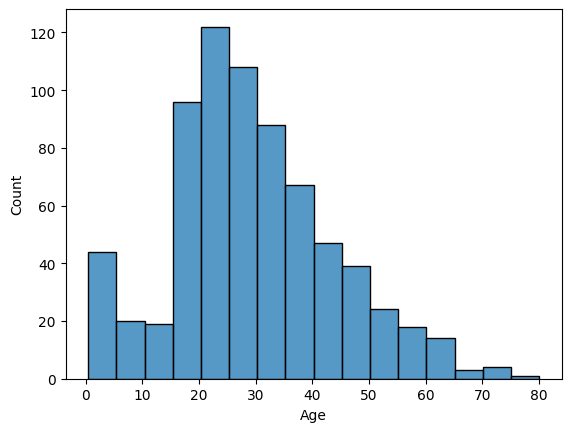

In [12]:
sns.histplot(df["Age"],bins=16)
plt.show()

<b>Observation:</b> The passengers' ages range from newborns to the elderly, with the majority falling between 20 and 30 years old. Other notable age groups include those between 0 and 5 years old, as well as those between 30 and 45 years old.

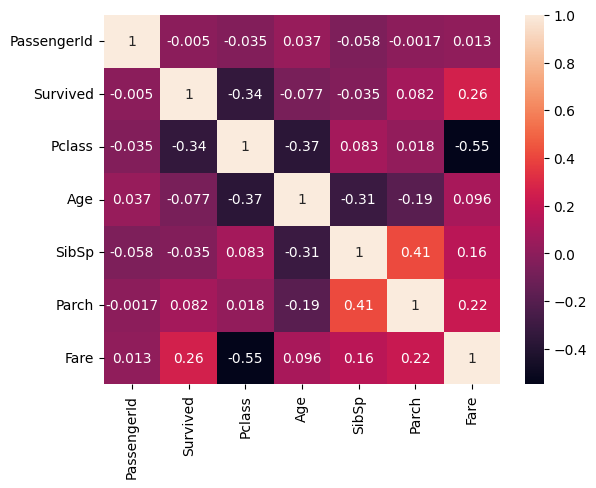

In [13]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

<b>Observation:</b> There are two features that correlate linearly with age, these are "Pclass" and "SibSp", the correlation coeficient
is pretty small, so filling NaN by preddicting different age values based on those features might not work

Looking for non-linear relationships

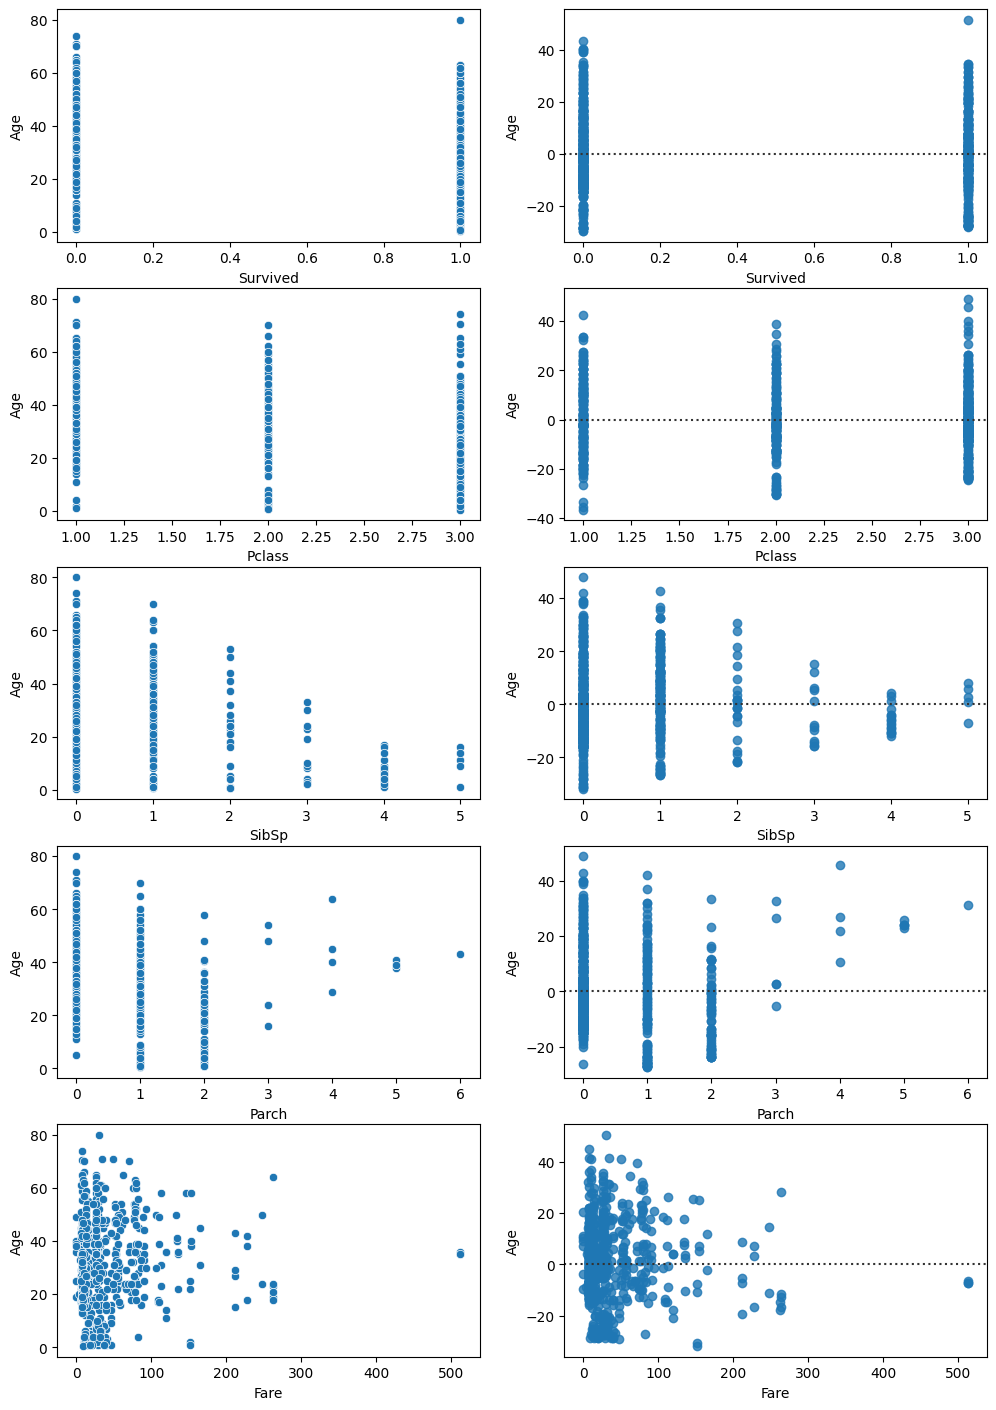

In [14]:
fig,axis = plt.subplots(5,2,figsize = (12,17.5))
for y,feature in enumerate(df.select_dtypes("number").drop(columns=["Age","PassengerId"]).columns):
    sns.scatterplot(data=df,x=feature,y="Age",ax=axis[y,0])
    sns.residplot(data=df,x=feature,y="Age",ax=axis[y,1])
    

<b>Observation:</b> The scatter and residual plots in the Titanic dataset suggest a relationship between age and the "SibSp" and "Parch" features. Specifically, it appears that when the number of family members present on the ship increases, the average age of passengers decreases. The "Pclass" and "Survived" variables also seem to differ between categories, and will be further investigated using other plots. However, the "Fare" feature has not yet revealed any relationship.

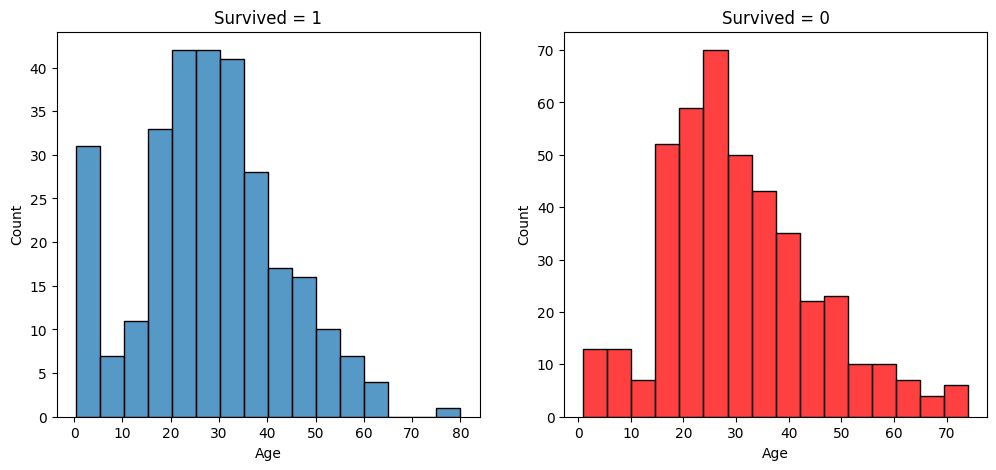

In [15]:
fig, axis = plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=df.loc[df["Survived"] == 1],x="Age",ax=axis[0])
axis[0].title.set_text("Survived = 1")
sns.histplot(data=df.loc[df["Survived"] == 0],x="Age",ax=axis[1],color="red")
axis[1].title.set_text("Survived = 0")
plt.show()             

In [16]:
df.groupby("Survived")["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

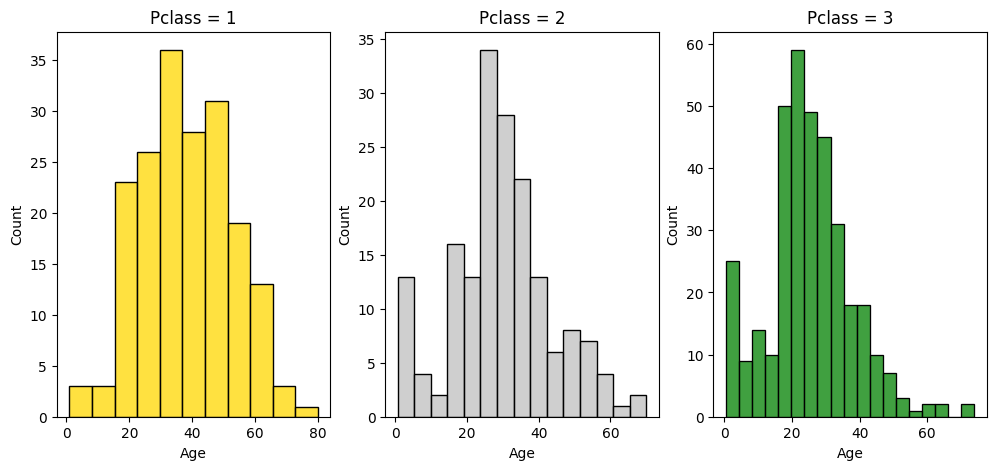

In [17]:
fig, axis = plt.subplots(1,3,figsize=(12,5))
sns.histplot(data=df.loc[df["Pclass"] == 1],x="Age",ax=axis[0],color="gold")
axis[0].title.set_text("Pclass = 1")
sns.histplot(data=df.loc[df["Pclass"] == 2],x="Age",ax=axis[1],color="silver")
axis[1].title.set_text("Pclass = 2")
sns.histplot(data=df.loc[df["Pclass"] == 3],x="Age",ax=axis[2],color="green")
axis[2].title.set_text("Pclass = 3")
plt.show()  

In [18]:
df.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

<b>Observation</b> it appears that individuals who were younger were more likely to survive compared to those who were older. This pattern is particularly noticeable among young children, as a larger percentage of them survived compared to those who did not. Moreover, the survival rate was significantly lower for older people. When it comes to passenger class, there were relatively fewer children in the first class compared to the other classes. The age distribution was relatively balanced in the second class, while the chance of being older was higher in the third class compared to other age groups, although it is worth noting that the chance of being old in the third class was still relatively low compared to the other age groups within the same class.

<b>Conclusion: "Pclass", "SibSp", "Survived" and "Pclass" </b> are picks among numeric data to be tested in predictive model
for age

Now the categorical data

In [19]:
object_features = df.select_dtypes("object")

In [20]:
object_features = pd.concat([object_features,df["Age"]],axis=1)

<b>Observation:</b> looking for relationships with "Age" in classes of "Name" or "Ticket" seems pointless, so we will only inspect "Sex" and "Embarked"

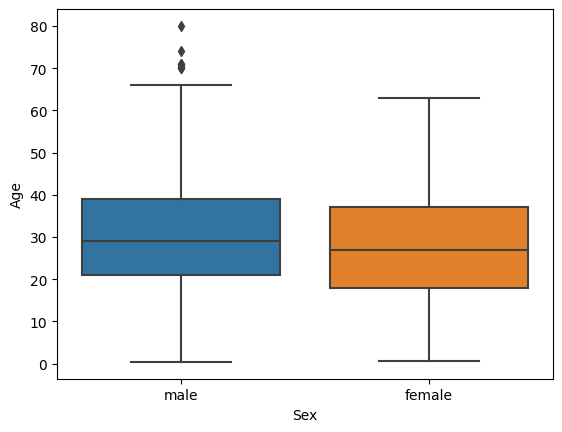

In [21]:
sns.boxplot(data=df, x="Sex",y="Age")
plt.show()

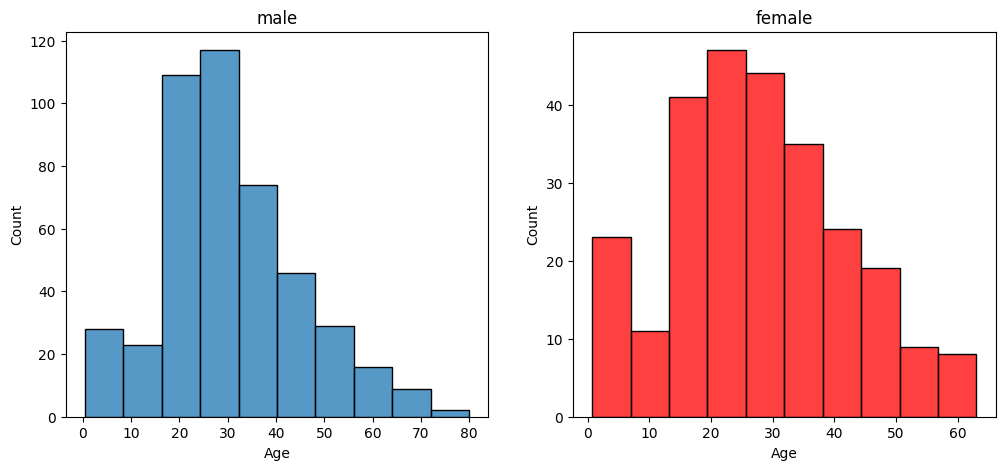

In [22]:
fig, axis = plt.subplots(1,2,figsize=(12,5))
sns.histplot(data=df.loc[df["Sex"] == "male"],x="Age",ax=axis[0],bins=10)
axis[0].title.set_text("male")
sns.histplot(data=df.loc[df["Sex"] == "female"],x="Age",ax=axis[1],color="red",bins=10)
axis[1].title.set_text("female")
plt.show()             

In [23]:
df.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<b>Observation:</b> age is more evenly distributed for females and for males there is huge concentration between ages 15 to 40

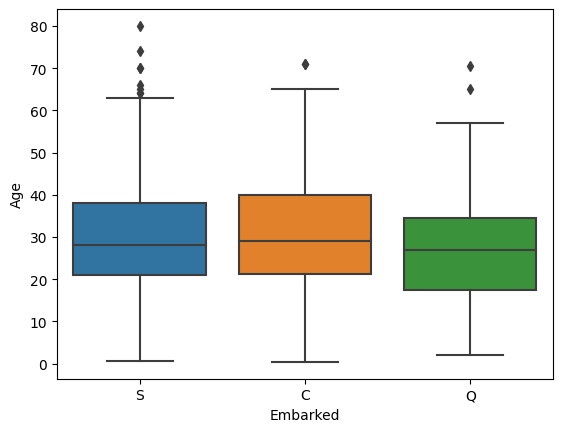

In [24]:
sns.boxplot(data=df,x="Embarked",y="Age")
plt.show()

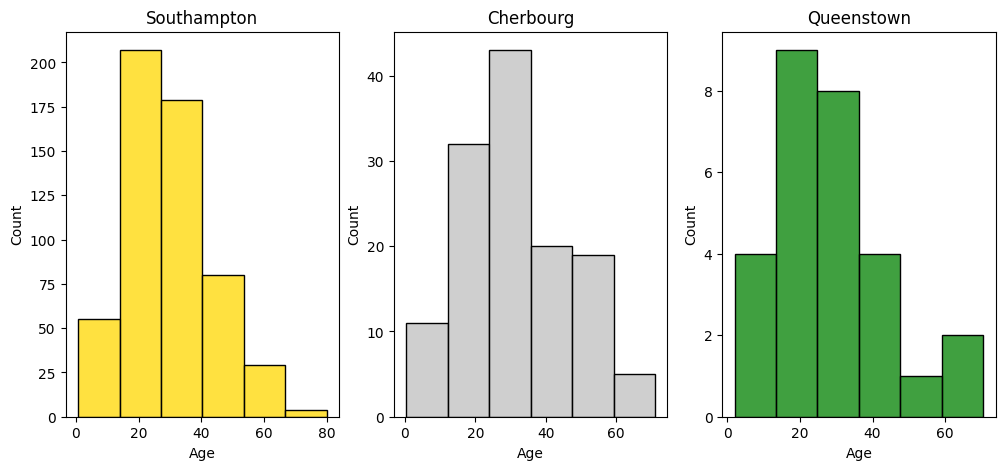

In [25]:
fig, axis = plt.subplots(1,3,figsize=(12,5))
sns.histplot(data=df.loc[df["Embarked"] == "S"],x="Age",ax=axis[0],color="gold",bins=6)
axis[0].title.set_text("Southampton")
sns.histplot(data=df.loc[df["Embarked"] == "C"],x="Age",ax=axis[1],color="silver",bins=6)
axis[1].title.set_text("Cherbourg")
sns.histplot(data=df.loc[df["Embarked"] == "Q"],x="Age",ax=axis[2],color="green",bins=6)
axis[2].title.set_text("Queenstown")
plt.show()  

In [26]:
df.groupby("Embarked")["Age"].mean()

Embarked
C    30.814769
Q    28.089286
S    29.445397
Name: Age, dtype: float64

<b>Observation:</b> based on the available data, it appears that individuals from Cherbourg were generally the oldest, followed by those from Queenstown, while the youngest people were from Southampton. However, it is worth noting that the majority of the data in the dataset comes from Southampton, whereas there is very little data from Queenstown. Therefore, the accuracy of these observations may not be entirely trustworthy and may require further investigation.

<b>Conclusion: "Sex" and "Embarked"</b> are chosen for building model, but note that all chosen features might be rejected later
on if they turn out not to be usefull

### Age prediction

Based on features we choosed, it can be seen that ages tend to "group" based of other features, so decision tree or random forest might be good model here, but first we need to encode categorical data to numeric

#### encoding

In [27]:
age_features = df[["Sex","Embarked","Survived","Pclass","SibSp","Parch"]]

In [28]:
age_features

,Sex,Embarked,Survived,Pclass,SibSp,Parch
0,male,S,0,3,1,0
1,female,C,1,1,1,0
2,female,S,1,3,0,0
3,female,S,1,1,1,0
4,male,S,0,3,0,0
...,...,...,...,...,...,...
886,male,S,0,2,0,0
887,female,S,1,1,0,0
888,female,S,0,3,1,2
889,male,C,1,1,0,0


In [29]:
ohe = OneHotEncoder()
ohe.fit_transform(age_features[["Embarked"]]).toarray()

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [30]:
ohe.categories_

[array(['C', 'Q', 'S', nan], dtype=object)]

There is an issue, Embarked still contains missing values, so we have to get rid of this

### Embarked

In [31]:
df["Embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

<b>Observation:</b> as we can see there are only 2 missing values, so in this case we can just fill them with most frequent class

In [32]:
df["Embarked"].fillna("S",inplace=True)

### Back to "Age" encoding

We have to initialize "age_featues" variable once again

In [33]:
age_features = df[["Sex","Embarked","Survived","Pclass","SibSp","Parch"]]
age_features

,Sex,Embarked,Survived,Pclass,SibSp,Parch
0,male,S,0,3,1,0
1,female,C,1,1,1,0
2,female,S,1,3,0,0
3,female,S,1,1,1,0
4,male,S,0,3,0,0
...,...,...,...,...,...,...
886,male,S,0,2,0,0
887,female,S,1,1,0,0
888,female,S,0,3,1,2
889,male,C,1,1,0,0


In [34]:
ohe.fit_transform(age_features[["Embarked","Sex"]]).toarray()

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       ...,
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [35]:
ohe.categories_

[array(['C', 'Q', 'S'], dtype=object), array(['female', 'male'], dtype=object)]

In [36]:
encode = make_column_transformer((OneHotEncoder(),["Sex","Embarked"]),remainder='passthrough')
encoded = encode.fit_transform(age_features)
encoded

array([[0., 1., 0., ..., 3., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 3., 0., 0.],
       ...,
       [1., 0., 0., ..., 3., 1., 2.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 3., 0., 0.]])

### Finding "Age" values using decision tree and random forest

In [37]:
missing_age_data = df.loc[df["Age"].isna()].drop(columns="Age")
missing_age_data

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,0,0,349217,7.8958,S


In [38]:
age_prediction_data = pd.DataFrame(encoded).drop(index=missing_age_data.index)
age_prediction_data

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
885,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,5.0
886,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
887,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
889,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [39]:
age_target_data = df.drop(index=missing_age_data.index)["Age"]
age_target_data

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

### Decision tree regression

In [40]:
# using grid search to find best set of hyperparameters
hyperparams = dict(criterion=["squared_error","absolute_error"],max_depth=list(range(1,11))+[None],
                   min_samples_split = [2,4,6])
tree_grid = GridSearchCV(DecisionTreeRegressor(),param_grid=hyperparams,scoring=["neg_mean_absolute_error","r2"],
                         refit="neg_mean_absolute_error",cv=10)

In [41]:
tree_grid.fit(age_prediction_data,age_target_data);

In [42]:
tree_grid.best_params_

{'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 4}

Best decision tree is simply with max_depth of 5 and rest parameters are default

In [43]:
-tree_grid.best_score_

9.190795074923802

This model's predictions for age are off by 9 years

In [44]:
age_tree_scores = pd.DataFrame(tree_grid.cv_results_)
age_tree_scores.loc[age_tree_scores["rank_test_neg_mean_absolute_error"] == 1,["mean_test_neg_mean_absolute_error","mean_test_r2"]]

,mean_test_neg_mean_absolute_error,mean_test_r2
13,-9.190795,0.284727


#### Is it better than just avarage value?

Let's investiage if the predictions made with decision tree are better than just using mean age to fill missing values

In [45]:
class MeanModel(BaseEstimator):
    def fit(self,X,y):
        self.y = y
        
    def predict(self,X):
        return np.full(X.shape[0], self.y.mean())        

In [46]:
-cross_val_score(MeanModel(),age_prediction_data,age_target_data,cv=10,scoring="neg_mean_absolute_error").mean()

11.362433895059565

So the model probably makes sense, it is more accurate by 2 years than using mean and R squared score is 0.29 which also suggests that it is more reasonable to use model than the mean

### Random forest regression

This time RandomizedSearchCV will be used, because random forest algorithm is much more expensive computationally

In [47]:
hyperparams = dict(criterion=["squared_error","absolute_error"],max_depth=list(range(1,11))+[None],
                   min_samples_split = [2,4,6],max_features = [0.25,0.5,0.75,1.0],n_estimators=range(25,201,25))

age_random_forest = RandomizedSearchCV(RandomForestRegressor(),param_distributions=hyperparams,n_iter=30,
                                       scoring=["neg_mean_absolute_error","r2"],refit="neg_mean_absolute_error",
                  n_jobs=-1,cv=10)

In [48]:
age_random_forest.fit(age_prediction_data,age_target_data);

In [49]:
age_random_forest.best_params_

{'n_estimators': 175,
 'min_samples_split': 6,
 'max_features': 1.0,
 'max_depth': 5,
 'criterion': 'squared_error'}

In [50]:
-age_random_forest.best_score_

9.110036491090538

In [51]:
forest_tree_scores = pd.DataFrame(age_random_forest.cv_results_)
forest_tree_scores.loc[forest_tree_scores["rank_test_neg_mean_absolute_error"] == 1,["mean_test_neg_mean_absolute_error","mean_test_r2"]]

,mean_test_neg_mean_absolute_error,mean_test_r2
15,-9.110036,0.315641


This model's predictions for age are off by 9 years which is the same in case of single decision tree

<b>Conclusion</b> Decision tree and random forest are better for filling the missing values of age, they are 10% more accurate. Suprisingly decision tree perofmed as good as random forest, this might happend due to using RandomizedSearchCV for random forest which might not have found as optimal hyperparameters as possible or it is just nature of the data and simple decision tree might be enough. But for prediction of actual missing age values I will use random forest. Goal of random forest algorithms is to generalize new unseen data better than single decision tree by reducing overfitting, that's why I think it is better choice.

### Filling missing age values with predicted ages

In [52]:
# final model used for prediction
age_model = age_random_forest.best_estimator_

In [53]:
encoded_missing_age_data =  pd.DataFrame(encoded).iloc[missing_age_data.index]
encoded_missing_age_data

,0,1,2,3,4,5,6,7,8
5,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0
17,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0
19,1.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0
26,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0
28,1.0,0.0,0.0,1.0,0.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
859,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0
863,1.0,0.0,0.0,0.0,1.0,0.0,3.0,8.0,2.0
868,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
878,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0


predicted age by index

In [54]:
missing_age = pd.Series(age_model.predict(encoded_missing_age_data),index=missing_age_data.index)
missing_age

5      33.518997
17     32.317450
19     19.699726
26     28.458193
28     21.841070
         ...    
859    28.458193
863     9.195838
868    28.786342
878    28.786342
888    28.100806
Length: 177, dtype: float64

Now we need to fill missing values with predicted data

In [55]:
df["Age"].fillna(missing_age,inplace=True)

In [56]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Titanic dataset is now clean and ready for EDA and predictive analysis

### Exploratory data analysis for "Survived"

In [57]:
# remainder of how dataset looked like
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


Based on previous experience "Name", "Ticket" and "PassengerId" can be rejected right away

In [58]:
# dropping unwanted columns
df.drop(columns=["PassengerId","Name","Ticket"],inplace=True)

In [59]:
# new dataset
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


### Pclass

In [60]:
# survival percentage by passenger class
survival_rate_pclass = df.groupby("Pclass")["Survived"].mean()
survival_rate_pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [61]:
# checking how many passengers there are by class
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

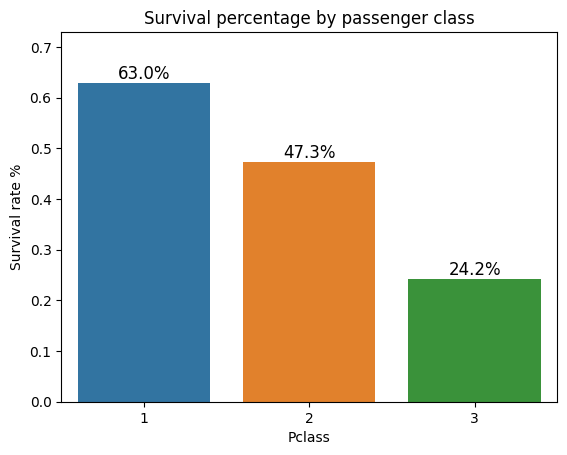

In [62]:
sns.barplot(x=survival_rate_pclass.index,y=survival_rate_pclass.values)
plt.ylabel("Survival rate %")

for index,value in enumerate(survival_rate_pclass.values):
    plt.annotate(str(round(value,3)*100)+"%",(index,value),ha='center',va="bottom",size=12)

plt.ylim(0,survival_rate_pclass.max()+0.1)    
plt.title("Survival percentage by passenger class")
    
plt.show()

In [63]:
# computing chi-squared test, to test significance between classes and survival distribution
chi2_contingency(pd.crosstab(df["Survived"],df["Pclass"]))

Chi2ContingencyResult(statistic=102.88898875696056, pvalue=4.549251711298793e-23, dof=2, expected_freq=array([[133.09090909, 113.37373737, 302.53535354],
       [ 82.90909091,  70.62626263, 188.46464646]]))

Chi-squared test confirms relationship between these two features

<b>Observation:</b> The more luxury passenger class the higher chances for surviving

### Sex

In [64]:
# calculating survival rate seprately for men and women
male_survival_rate = df.loc[df["Sex"] == "male","Survived"].value_counts(normalize=True).sort_index()
female_survival_rate = df.loc[df["Sex"] == "female","Survived"].value_counts(normalize=True).sort_index()
df.groupby("Sex")["Survived"].mean().apply(lambda x: str(round(x,3)*100)+"%").rename_axis("Survival rate by sex").to_frame()

,Survived
Survival rate by sex,
female,74.2%
male,18.9%


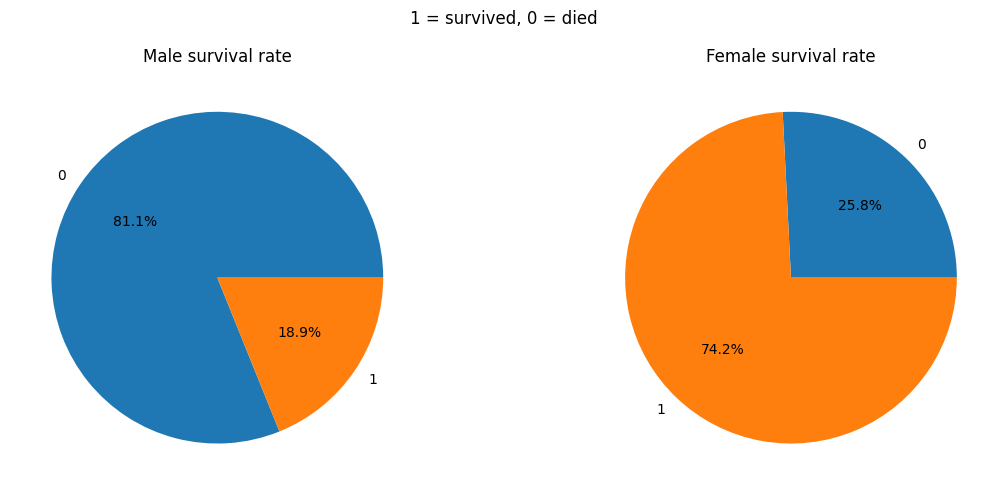

In [65]:
fig,ax = plt.subplots(1,2,figsize=(12,5))

ax[0].pie(male_survival_rate,labels=male_survival_rate.index,autopct="%1.1f%%")
ax[0].title.set_text("Male survival rate")

ax[1].pie(female_survival_rate,labels=female_survival_rate.index,autopct="%1.1f%%")
ax[1].title.set_text("Female survival rate")


fig.suptitle('1 = survived, 0 = died')
plt.tight_layout()
plt.show()

In [66]:
# chi-squared test, to see if these differences are not due to the random chance
chi2_contingency(pd.crosstab(df["Sex"],df["Survived"]))

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))

Chi-square test confirms relationship between these two features

<b>Observation:</b> Survival rate for women is much higher than for men

#### Sex and Pclass

Text(0.5, 1.0, 'Survival % by sex and passenger class')

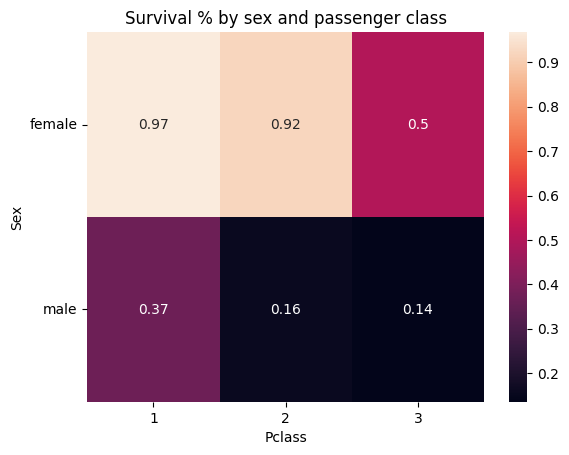

In [67]:
sns.heatmap(df.pivot_table(values="Survived", index="Sex", columns="Pclass", aggfunc="mean"),annot=True)
plt.yticks(rotation=0)
plt.title("Survival % by sex and passenger class")

In [68]:
# again chi-squared test
chi2_contingency(df.pivot_table(values="Survived", index="Sex", columns="Pclass", aggfunc="size"))

Chi2ContingencyResult(statistic=16.971499095517114, pvalue=0.00020638864348233114, dof=2, expected_freq=array([[ 76.12121212,  64.84399551, 173.03479237],
       [139.87878788, 119.15600449, 317.96520763]]))

Chi-square test shows that there is difference in "Survived" distribution depending if someone is female or male if different pessanger classes.

<b>Observation:</b> it can be seen that both "Sex" and "Pclass" have big impact on survival rate, but "Sex" much more impactful

### Age

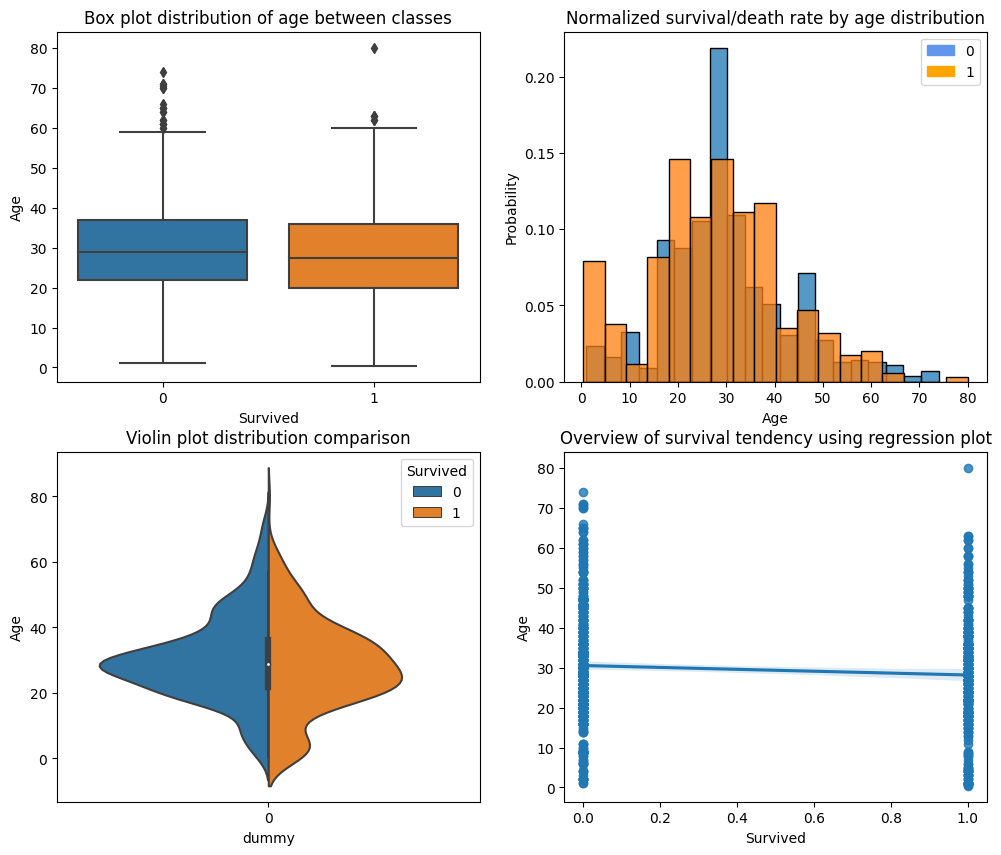

In [69]:
fig,ax = plt.subplots(2,2,figsize = (12,10))

sns.boxplot(x=df["Survived"],y=df["Age"],ax=ax[0,0])

ax[0,0].title.set_text("Box plot distribution of age between classes")

sns.histplot(data=df.loc[df["Survived"]==0],x="Age",ax=ax[0,1],stat="probability")
sns.histplot(data=df.loc[df["Survived"]==1],x="Age",ax=ax[0,1],stat="probability")

ax[0,1].title.set_text("Normalized survival/death rate by age distribution")

ax[0,1].legend(labels=[0,1])

ax[0,1].get_legend().legendHandles[0].set_color('cornflowerblue')
ax[0,1].get_legend().legendHandles[1].set_color('orange')

df["dummy"] = 0
sns.violinplot(data=df,x="dummy" ,y="Age", hue="Survived",ax=ax[1,0],split=True)
df.drop(columns="dummy",inplace=True)
ax[1,0].title.set_text("Violin plot distribution comparison")

sns.regplot(x=df["Survived"],y=df["Age"],ax=ax[1,1])
ax[1,1].title.set_text("Overview of survival tendency using regression plot")

plt.show()

T-test of independent means

In [70]:
# the t-test will help determine whether the difference 
# in mean age values between the groups of survivors and non-survivors is statistically significant
ttest_ind(df.loc[df["Survived"] == 1, "Age"],df.loc[df["Survived"] == 0, "Age"])

Ttest_indResult(statistic=-2.535974652113561, pvalue=0.01138368581462867)

T-test indicates that there is indeed significant difference between means of age between groups of people who survived and ones that did not

In [71]:
# desribtive statistics for "Age" by "Survived" to check distribution with actual numbers
df.groupby("Survived")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.503098,13.200627,1.00,22.0,28.786342,37.0,74.0
1,342.0,28.135156,14.104832,0.42,20.0,27.495195,36.0,80.0


<b>Observation:</b> People who survived tend to be a little bit younger, specially among youngest passengers, survival rate is higher

#### Age and Sex

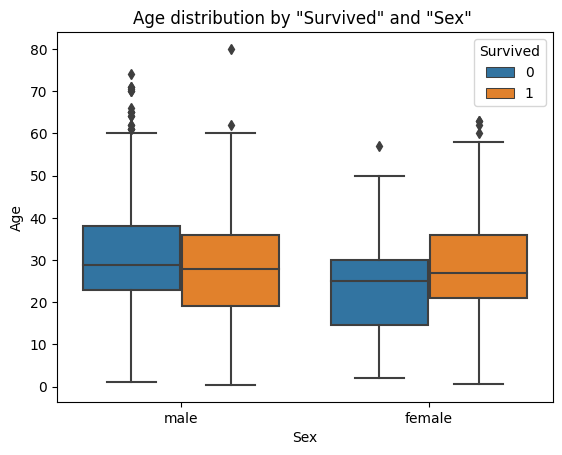

In [72]:
sns.boxplot(data=df,x="Sex",y="Age",hue="Survived")
plt.title("Age distribution by \"Survived\" and \"Sex\" ")
plt.show()

In [73]:
# describtive statistics
df.groupby(["Sex","Survived"])["Age"].describe()

count       mean        std   min   25%        50%   75%  \
Sex    Survived                                                             
female 0          81.0  23.974956  12.972229  2.00  14.5  25.000000  30.0   
       1         233.0  28.438135  13.342868  0.75  21.0  27.000000  36.0   
male   0         468.0  31.632969  12.922177  1.00  23.0  28.786342  38.0   
       1         109.0  27.487504  15.655468  0.42  19.0  27.990390  36.0   

                  max  
Sex    Survived        
female 0         57.0  
       1         63.0  
male   0         74.0  
       1         80.0

<b>Observation:</b> Males who died tend to be older than males who survived, and females who died tend to be younger that females who survived. In case of females it is opposite what we observed earlies that people older are more likely to die. One reason might be that difference between ages of poeple who survived and died was not that big and it mostly applied for children, so that relationship is not too strong, other theory might be that difference in females ages between ones that survived and not is not statistically significant. Let's explore this.

In [74]:
# spliting women into two groups, these who survived and these who did not
female_survival = df.loc[df["Sex"]=="female"]
female_survival_0 = female_survival.loc[df["Survived"]==0]
female_survival_1 = female_survival.loc[df["Survived"]==1]

In [75]:
# t-test to investiage female age distributions by "Survived"
ttest_ind(female_survival_0["Age"],female_survival_1["Age"])

Ttest_indResult(statistic=-2.6116970889686097, pvalue=0.009444994018881119)

<b>Observation:</b> There is a significant difference in the mean age of females when grouped by survival status. The fact that the relationship between age and survival for women is opposite to what was previously observed for all passengers suggests that the overall age/survival relation is weak. I have decided to be more cautious with this feature and plan to conduct tests later to determine if models perform better or worse with the inclusion of this feature.

### SibSp

In [76]:
# calculating survival rate and total survivors count for "SibSp" groups
sibsp_survival_rate = df.groupby("SibSp")["Survived"].mean()
sibsp_survived_count = df.groupby("SibSp")["Survived"].sum()

Distribution of "SibSp"

In [77]:
# total number of passengers in each "SibSp" group
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<b>Observation:</b> most people traveled alone or with one sibling

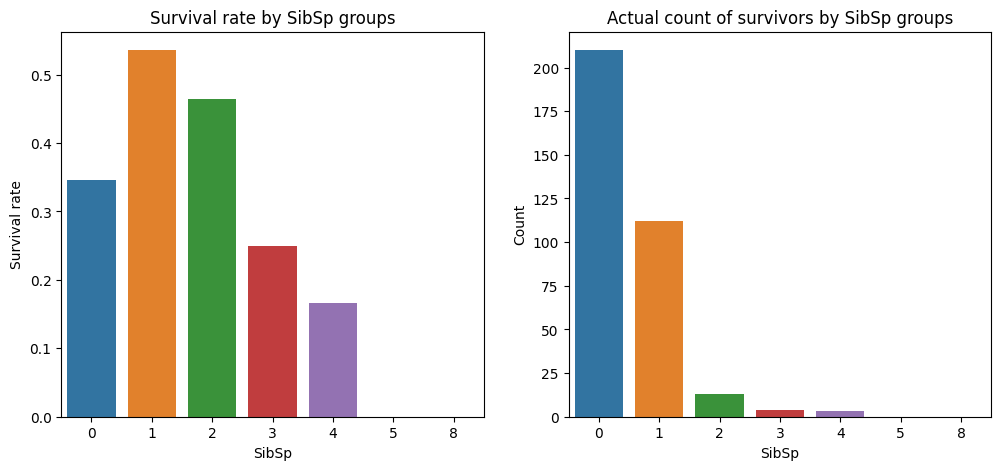

In [78]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

sns.barplot(x=sibsp_survival_rate.index,y=sibsp_survival_rate.values,ax=ax[0])

ax[0].title.set_text("Survival rate by SibSp groups")
ax[0].set_ylabel("Survival rate")

sns.barplot(x=sibsp_survived_count.index,y=sibsp_survived_count.values,ax=ax[1])

ax[1].title.set_text("Actual count of survivors by SibSp groups")
ax[1].set_ylabel("Count")

plt.show()

In [79]:
# chi-squared test for "Survived" and "SibSp"
chi2_contingency(pd.crosstab(index=df["Survived"],columns=df["SibSp"]))

Chi2ContingencyResult(statistic=37.27179291520431, pvalue=1.5585810465902118e-06, dof=6, expected_freq=array([[374.62626263, 128.77777778,  17.25252525,   9.85858586,
         11.09090909,   3.08080808,   4.31313131],
       [233.37373737,  80.22222222,  10.74747475,   6.14141414,
          6.90909091,   1.91919192,   2.68686869]]))

<b>Observation</b>: There are differences in survival between groups of "SibSp", and these differences are statistically significant. However, these differences are not linear (the growing amount of siblings onboard does not increase or decrease the survival rate linearly). Additionally, these differences might not be too trustworthy due to the small amount of data (there are a lot of passengers in groups 0 and 1, and very few in the rest of the groups). There is a huge difference in data distribution.


### Parch

In [80]:
# distribtion of samples for each "Parch" group
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<b>Observation:</b> Most people traveled alone or with 1/2 family parents/children

In [81]:
# survival rate for each "Parch" group
parch_survival_rate = df.groupby("Parch")["Survived"].mean()
# count of people who survived by "Parch" group
parch_survived_count = df.groupby("Parch")["Survived"].sum()

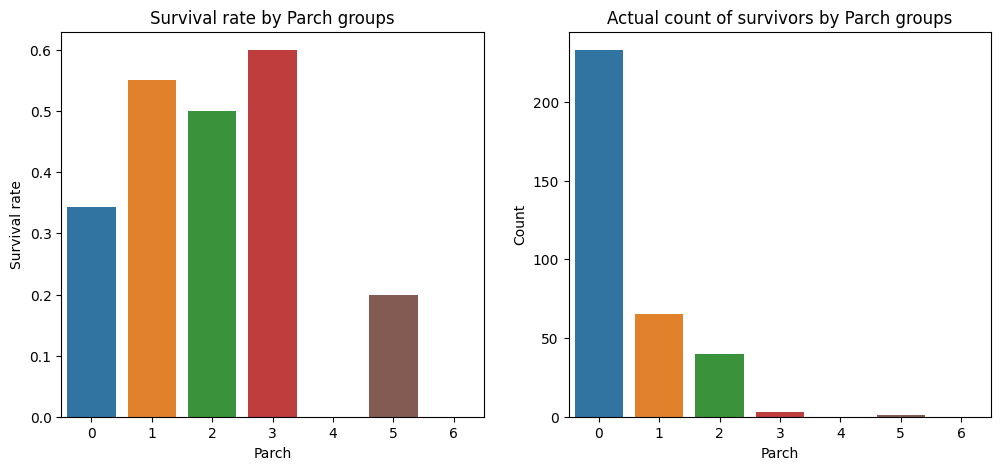

In [82]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

sns.barplot(x=parch_survival_rate.index,y=parch_survival_rate.values,ax=ax[0])

ax[0].title.set_text("Survival rate by Parch groups")
ax[0].set_ylabel("Survival rate")

sns.barplot(x=parch_survived_count.index,y=parch_survived_count.values,ax=ax[1])

ax[1].title.set_text("Actual count of survivors by Parch groups")
ax[1].set_ylabel("Count")

plt.show()

In [83]:
# chi-squared test
chi2_contingency(pd.crosstab(index=df["Survived"],columns=df["Parch"]))

Chi2ContingencyResult(statistic=27.925784060236168, pvalue=9.703526421039996e-05, dof=6, expected_freq=array([[4.17757576e+02, 7.27070707e+01, 4.92929293e+01, 3.08080808e+00,
        2.46464646e+00, 3.08080808e+00, 6.16161616e-01],
       [2.60242424e+02, 4.52929293e+01, 3.07070707e+01, 1.91919192e+00,
        1.53535354e+00, 1.91919192e+00, 3.83838384e-01]]))

<b>Observation:</b> This feature is really similar to "SibSp" feature, there are same issues like data distribution inbalance among classes, but also some of classes like 1, 2, 3 show improvement of survival rate. Feature yet to be investigated during model validation

### Fare

Text(0.5, 0.98, '1 = survived, 0 = died')

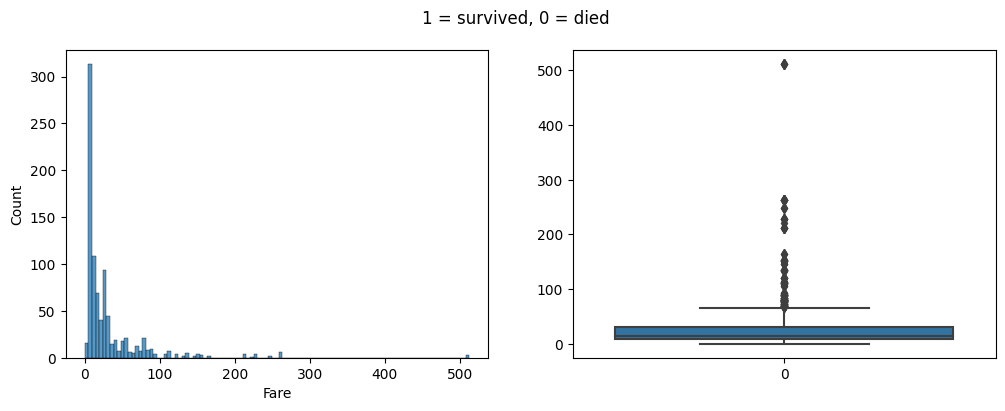

In [84]:
fig,ax = plt.subplots(1,2,figsize = (12,4))

sns.histplot(df["Fare"],ax=ax[0])


sns.boxplot(df["Fare"],ax=ax[1])

fig.suptitle('1 = survived, 0 = died')

In [85]:
# it's hard to see distribution of data using visualization, let's see actual numbers
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<b>Observation:</b> "Fare" feature is really widely distributed and has lots of outliers. Still we can see that most of data falls between 8 and 31.

<b style="color: red;">NOTE:</b> "Fare" distribution will be limited to 200 for better vislalization

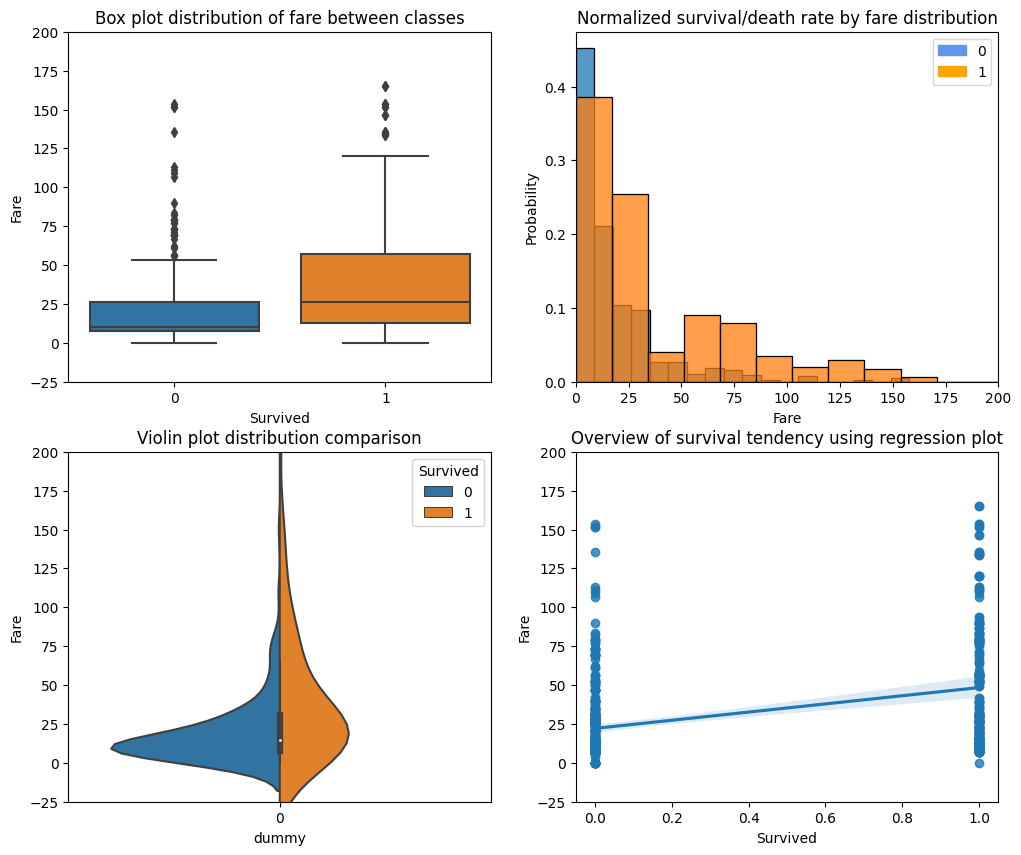

In [86]:
fig,ax = plt.subplots(2,2,figsize = (12,10))

sns.boxplot(x=df["Survived"],y=df["Fare"],ax=ax[0,0])

ax[0,0].title.set_text("Box plot distribution of fare between classes")

sns.histplot(data=df.loc[df["Survived"]==0],x="Fare",ax=ax[0,1],stat="probability",bins=30)
sns.histplot(data=df.loc[df["Survived"]==1],x="Fare",ax=ax[0,1],stat="probability",bins=30)

ax[0,1].title.set_text("Normalized survival/death rate by fare distribution")

ax[0,1].legend(labels=[0,1])

ax[0,1].get_legend().legendHandles[0].set_color('cornflowerblue')
ax[0,1].get_legend().legendHandles[1].set_color('orange')

df["dummy"] = 0
sns.violinplot(data=df,x="dummy" ,y="Fare", hue="Survived",ax=ax[1,0],split=True)
df.drop(columns="dummy",inplace=True)
ax[1,0].title.set_text("Violin plot distribution comparison")

sns.regplot(x=df["Survived"],y=df["Fare"],ax=ax[1,1])
ax[1,1].title.set_text("Overview of survival tendency using regression plot")

ax[0,0].set_ylim(-25,200)
ax[0,1].set_xlim(0,200)
ax[1,0].set_ylim(-25,200)
ax[1,1].set_ylim(-25,200)

plt.show()

In [87]:
# t-test
ttest_ind(df.loc[df["Survived"] == 1, "Fare"],df.loc[df["Survived"] == 0, "Fare"])

Ttest_indResult(statistic=7.939191660871055, pvalue=6.120189341924198e-15)

In [88]:
# desribtive statistics for "Fare" by "Survived"
df.groupby("Survived")["Fare"].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


<b>Observation:</b> Higher chance of surviving for people who paid more is clear. This difference is also statistically significant as showed by t-test

### Embarked

In [89]:
# samples distribution for "Embarked" classes
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<b>Observation:</b> There is inbalance in distribution, but all groups seem to have reasonable amount of data

In [90]:
# survival percentage by ship boarding town
embarked_survival_rate = df.groupby("Embarked")["Survived"].mean()
embarked_survival_rate

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

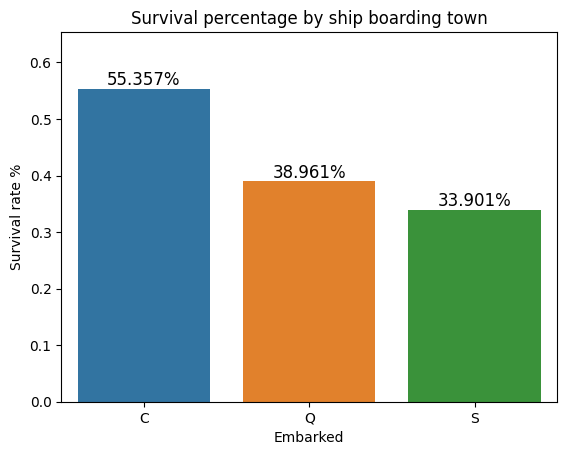

In [91]:
sns.barplot(x=embarked_survival_rate.index,y=embarked_survival_rate.values)
plt.ylabel("Survival rate %")

for index,value in enumerate(embarked_survival_rate.values):
    plt.annotate(str(round(value*100,3))+"%",(index,value),ha='center',va="bottom",size=12)

plt.ylim(0,embarked_survival_rate.max()+0.1)    
plt.title("Survival percentage by ship boarding town")
    
plt.show()

In [92]:
# chi-squared test
chi2_contingency(pd.crosstab(index=df["Survived"],columns=df["Embarked"]))

Chi2ContingencyResult(statistic=25.964452881874784, pvalue=2.3008626481449577e-06, dof=2, expected_freq=array([[103.51515152,  47.44444444, 398.04040404],
       [ 64.48484848,  29.55555556, 247.95959596]]))

<b>Observation:</b> chi-squared test showed that difference between means of each group is statistically significant. Feature itself shows imprvement in survival rate for people embarked in Cherbourg (C), for rest of cities it shows survival rate closer to the overall mean survival rate, it is a decent predictive feature

## Feature selection

Now it's time to summarize exploratory data analysis and select features with predictive value

<ul>
  <li>Pclass - Good predictor: As class number goes from 3 to 1, chances of surviving increase</li>
  <li>Sex - Good predictor: There is a clear difference between men and women. Women have a much higher survival rate</li>
  <li>Age - Moderate predictor: Being younger increases chances of surviving, especially for the youngest passengers</li>
  <li>SibSp - Moderate predictor: Two classes show a difference in survival rate compared to the rest. The class suffers from imbalance</li>
  <li>Parch - Moderate predictor: Similar pattern to SibSp, but suffers from imbalanced distribution as well</li>
  <li>Fare - Good predictor: Paying less for the voyage clearly lowers chances of surviving</li>
  <li>Embarked - Good predictor: The feature is pretty well balanced, with lots of samples for each class. There is one clearly dominating class regarding a higher survival rate</li>
</ul>

### Multicollinearity

Features have to be investigated for multicollinearity, which is an unwanted thing during model training. It might lead to overfitting, an inappropriate effect of multicollinear features on predictions, and unnecessary information for the model

<AxesSubplot: >

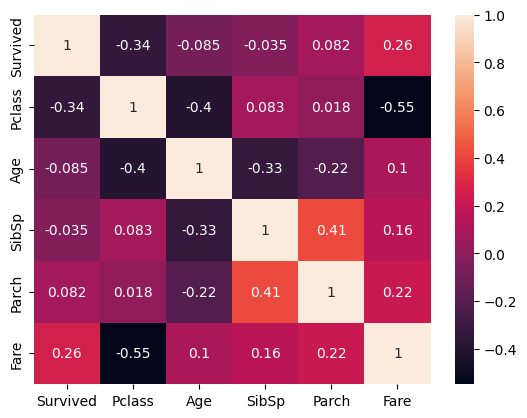

In [93]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<b>Observation:</b> there is no very strong correlation between any of features

<b>Conclusion:</b> All features have predictive potential, but <b>SibSp</b>, <b>Parch</b> and <b>Age</b> have some drawbacks and working with these classes require awarness

## Spliting the data into features and target

In [94]:
# spliting using DataFrame indexing
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [95]:
X.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C


In [96]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

## Feature encoding

The features "Sex" and "Embarked" need to be converted from strings to numeric values due to compatibility with scikit-learn classes

In [97]:
# One Hot Encoding with the dropping of one column for each feature to avoid multicollinearity and unnecessary information.
encoded = make_column_transformer((OneHotEncoder(drop="first"), ["Sex","Embarked"]),remainder="passthrough").fit_transform(X)
encoded.shape

(891, 8)

Scikit-learn column transformer removed column names, I will restore them for convenience

In [98]:
X = pd.DataFrame(encoded,columns=["Is_male","Embarked_S","Embarked_C"]+X.drop(columns=["Sex","Embarked"]).columns.to_list())

In [99]:
# new feature dataset
X

,Is_male,Embarked_S,Embarked_C,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,1.0,3.0,22.000000,1.0,0.0,7.2500
1,0.0,0.0,0.0,1.0,38.000000,1.0,0.0,71.2833
2,0.0,0.0,1.0,3.0,26.000000,0.0,0.0,7.9250
3,0.0,0.0,1.0,1.0,35.000000,1.0,0.0,53.1000
4,1.0,0.0,1.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...
886,1.0,0.0,1.0,2.0,27.000000,0.0,0.0,13.0000
887,0.0,0.0,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,0.0,1.0,3.0,28.100806,1.0,2.0,23.4500
889,1.0,0.0,0.0,1.0,26.000000,0.0,0.0,30.0000


## Model selection

It's time to test different classifiers, hyperparameters and features to find best predictive model for survival in Titanic dataset

### Logistic regression

There is one issue with logistic regression. It fits best when there is a linear relationship between the feature and the target. However, logistic regression does not work well with the 'SibSp' and 'Parch' features, so they need to be one hot encoded despite already being numerical. This enables logistic regression to find patterns between whether SibSp/Parch equals a certain number or not. In case of Pclass, Embarked and Pclass they are either already one hot encoded or their ordinal nature show linear relationship with survival rate so they don't need working on (Pclass)

1.Logistic regression with all features

In [100]:
# all features encdoded especially for logistic regression nature
lr_X_all = make_column_transformer((OneHotEncoder(drop="first"),["SibSp","Parch"]),remainder="passthrough").fit_transform(X)
pd.DataFrame(lr_X_all).head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,22.0,7.2500
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,71.2833
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,26.0,7.9250


In [101]:
pd.DataFrame(cross_validate(LogisticRegression(max_iter=1000),lr_X_all,y,scoring=["accuracy","precision","recall","f1"],cv=10))\
.mean()

fit_time          0.111578
score_time        0.004214
test_accuracy     0.813720
test_precision    0.778788
test_recall       0.725210
test_f1           0.746754
dtype: float64

<b>Observation:</b> Logistic regression model with default parameters and all features included has <b>81.4%</b> accuracy and F1 score of <b>74.6%</b> which indicates that model performs worse for finding people who survived, which makes sense due to high inbalance in dataset, as was discovered in the very beggining only about 38% people survived, this means we have less data for this class, but I think overall scores are pretty good

2.Logistic regression with limited features

Here I will supply different combinations of features for model training and see the results

In [102]:
# different combinations of excluding "Age", "SibSp" and "Parch" from the dataset
lr_X_comb1 = make_column_transformer((OneHotEncoder(drop="first"),["SibSp","Parch"]),remainder="passthrough").fit_transform(X.drop(columns=["Age"]))
lr_X_comb2 = make_column_transformer((OneHotEncoder(drop="first"),["Parch"]),remainder="passthrough").fit_transform(X.drop(columns=["SibSp"]))
lr_X_comb3 = make_column_transformer((OneHotEncoder(drop="first"),["SibSp"]),remainder="passthrough").fit_transform(X.drop(columns=["Parch"]))
lr_X_comb4 = make_column_transformer((OneHotEncoder(drop="first"),["Parch"]),remainder="passthrough").fit_transform(X.drop(columns=["Age","SibSp"]))
lr_X_comb5 = make_column_transformer((OneHotEncoder(drop="first"),["SibSp"]),remainder="passthrough").fit_transform(X.drop(columns=["Age","Parch"]))
lr_X_comb6 = X.drop(columns=["Age","SibSp","Parch"])
lr_X_comb7 = X.drop(columns=["Parch","SibSp"])

# list of these combinations
lr_X_combinations = [lr_X_comb1,lr_X_comb2,lr_X_comb3,lr_X_comb4,lr_X_comb5,lr_X_comb6,lr_X_comb7]

In [103]:
# cross-validating different combinations of datasets using logsitic regression
for index,dataset in enumerate(lr_X_combinations):
    print(f"Using dataset {index+1}:")
    print(pd.DataFrame(cross_validate(LogisticRegression(max_iter=1000),dataset,y,scoring=["accuracy","precision","recall","f1"]
                                      ,n_jobs=-1,cv=10)).mean())
    print()

Using dataset 1:
fit_time          0.042799
score_time        0.005301
test_accuracy     0.785643
test_precision    0.737750
test_recall       0.690168
test_f1           0.710682
dtype: float64

Using dataset 2:
fit_time          0.044398
score_time        0.004801
test_accuracy     0.800262
test_precision    0.755491
test_recall       0.710588
test_f1           0.729516
dtype: float64

Using dataset 3:
fit_time          0.046598
score_time        0.004901
test_accuracy     0.810350
test_precision    0.772267
test_recall       0.719328
test_f1           0.741219
dtype: float64

Using dataset 4:
fit_time          0.029999
score_time        0.006801
test_accuracy     0.774407
test_precision    0.715436
test_recall       0.693025
test_f1           0.700950
dtype: float64

Using dataset 5:
fit_time          0.021599
score_time        0.005000
test_accuracy     0.787865
test_precision    0.739836
test_recall       0.695966
test_f1           0.714468
dtype: float64

Using dataset 6:
fit_time

<b>Observation:</b> excluding any features for model training did not improve model's performance, all statistics got worse, so keeping all features is valuable information gain

<b>Conclusion:</b> Logistic regression models will be trained with all features, eventually L1 penalty and L2 penalty can handle less important feautres

3.Logistic regression L2 penalty tuning hyperparameters 

In [104]:
# list of hyperparameters to check
lr_l2_hyperparameters = {"C":np.concatenate((np.linspace(0.001,1,10),np.array([10,50,100]))),
                         "solver":["lbfgs","liblinear","newton-cg","newton-cholesky","sag","saga"]}

In [105]:
# GridSearchCV to test all different parameters and find best performing model
lr_l2=GridSearchCV(LogisticRegression(max_iter=1000),param_grid=lr_l2_hyperparameters,
                   scoring=["accuracy","precision","recall","f1"],cv=10,n_jobs=-1,refit="accuracy")

In [106]:
# train every model with all features
lr_l2.fit(lr_X_all,y);

In [107]:
# this cell and cell below show best parameters with most accuracy
lr_l2.best_params_

{'C': 50.0, 'solver': 'lbfgs'}

In [108]:
# results of best models
pd.DataFrame(lr_l2.cv_results_).loc[pd.DataFrame(lr_l2.cv_results_)["rank_test_accuracy"] == 1,
                                    ["param_solver","param_C","mean_test_accuracy","mean_test_f1"]]

,param_solver,param_C,mean_test_accuracy,mean_test_f1
66,lbfgs,50.0,0.817066,0.751164
68,newton-cg,50.0,0.817066,0.751164
69,newton-cholesky,50.0,0.817066,0.751164
72,lbfgs,100.0,0.817066,0.751164
73,liblinear,100.0,0.817066,0.751164
74,newton-cg,100.0,0.817066,0.751164
75,newton-cholesky,100.0,0.817066,0.751164


<b>Observation:</b> In case of L2 penalty, increasing C to 10 showed improvement, also switching the algorithm resulted in a modest increase in accuracy and f1 score. The accuracy improved to <b>81.7%</b>, while the f1 score improved to <b>75.1%</b>.

4.Logistic regression L1 penalty tuning hyperparameters

In [109]:
# list of hyperparameters to check
lr_l1_hyperparameters = {"C":np.concatenate((np.linspace(0.001,1,10),np.array([10,50,100]))),"solver":["liblinear","saga"]}

In [110]:
# grid search object for logisitc regression
lr_l1=GridSearchCV(LogisticRegression(max_iter=1000,penalty="l1"),param_grid=lr_l1_hyperparameters,
                   scoring=["accuracy","precision","recall","f1"],cv=10,n_jobs=-1,refit="accuracy")

In [111]:
# fitting different models to data with all features
lr_l1.fit(lr_X_all,y);

In [112]:
# best hyperparameters found
lr_l1.best_params_

{'C': 50.0, 'solver': 'liblinear'}

In [113]:
# results of best models
pd.DataFrame(lr_l1.cv_results_).loc[pd.DataFrame(lr_l1.cv_results_)["rank_test_accuracy"] == 1,
                                    ["param_solver","param_C","mean_test_accuracy","mean_test_f1"]]

,param_solver,param_C,mean_test_accuracy,mean_test_f1
22,liblinear,50.0,0.81819,0.753174
24,liblinear,100.0,0.81819,0.753174


<b>Observation:</b> L1 penalty works slightly worse than L2, with best algorihtm as "liblinear" and C of 10, 50 and 100 with accuracy of <b>81.5%</b> and F1 score of <b>74.9%</b>

5.Logistic regression without penalty tuning hyperparameters

In [114]:
# list of hyperparameters to check
lr_nopenalty_hyperparameters = {"solver":["newton-cg","newton-cholesky","sag","saga"]}

In [115]:
# grid search object
lr_nopenalty=GridSearchCV(LogisticRegression(max_iter=1000,penalty=None),param_grid=lr_nopenalty_hyperparameters,
                   scoring=["accuracy","precision","recall","f1"],cv=10,n_jobs=-1,refit="accuracy")

In [116]:
# fitting models to the data
lr_nopenalty.fit(lr_X_all,y);

In [117]:
# best hyperparameters
lr_nopenalty.best_params_

{'solver': 'newton-cg'}

In [118]:
# cross-validation results of best models
pd.DataFrame(lr_nopenalty.cv_results_).loc[pd.DataFrame(lr_nopenalty.cv_results_)["rank_test_accuracy"] == 1,
                                    ["param_solver","mean_test_accuracy","mean_test_f1"]]

,param_solver,mean_test_accuracy,mean_test_f1
0,newton-cg,0.81819,0.753174
1,newton-cholesky,0.81819,0.753174


<b>Observation:</b> Not using regularization for logistic regression did not bring any outstanding results. Best accuracy is <b>81.5%</b> and best F1 score is <b>74.9%</b>

<b>Logistic regression summary:</b> Best cross-validation score was <b>81.7%</b> accuracy and <b>75.1%</b> F1 score, achived my model with hyperparameters:
- penalty = L2
- solver = lbfgs/newton-cg/newton-cholesky
- C = 10

### Decision tree

Decision tree might be a good choice for Titanic dataset, the trouble with feature selection and nature of features to group based on target variable is well handled by decision trees. No additional encoding will be performed due to those facts

In [119]:
# data that will be used
X.head(3)

,Is_male,Embarked_S,Embarked_C,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,1.0,3.0,22.0,1.0,0.0,7.2500
1,0.0,0.0,0.0,1.0,38.0,1.0,0.0,71.2833
2,0.0,0.0,1.0,3.0,26.0,0.0,0.0,7.9250


1.Default decision tree (default hyperparameters)

In [120]:
# cross-validation results
pd.DataFrame(cross_validate(DecisionTreeClassifier(),X,y,scoring=["accuracy","precision","recall","f1"],cv=10))\
.mean()

fit_time          0.003200
score_time        0.005699
test_accuracy     0.800287
test_precision    0.741879
test_recall       0.745462
test_f1           0.740241
dtype: float64

<b>Observation:</b> Decision tree classififer with default hyperparameters has accuracy of <b>79.2%</b> and F1 score of <b>72.5%</b>

2.Decision tree tuning hyperparameters

In [121]:
# hyperparamaeters for decision tree
dt_hyperparameters = {"criterion":["gini","entropy","log_loss"],"max_depth":[None,len(X.columns),5,10],
                     "min_samples_split":[2,4,10],"min_samples_leaf":[1,5,10],"max_features":["auto",1.0,0.5],
                     "min_impurity_decrease":[0.0,0.1,0.2]}

In [122]:
# grid search with decision tree classifier
dt = GridSearchCV(DecisionTreeClassifier(),param_grid=dt_hyperparameters,scoring=["accuracy","precision","recall","f1"],
            refit="accuracy",cv=10,n_jobs=-1)

In [123]:
# fitting different decision trees
dt.fit(X,y);

In [124]:
# best hyperparameters for decision tree
dt.best_params_

{'criterion': 'log_loss',
 'max_depth': 8,
 'max_features': 0.5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 4}

In [125]:
# cross-validation results
pd.DataFrame(dt.cv_results_).loc[pd.DataFrame(dt.cv_results_)["rank_test_accuracy"]==1,
                                 ["mean_test_accuracy","mean_test_f1","mean_test_precision","mean_test_recall"]]

,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall
787,0.846255,0.78445,0.841661,0.742605


<b>Observation:</b> The decision tree model, optimized with the best hyperparameters found through GridSearchCV, exhibited substantial improvements in accuracy <b>84.5%</b> and F1 score <b>77.6%</b>

### Random forest

1.Default random forest

In [126]:
# cross-validation of default random forest
pd.DataFrame(cross_validate(RandomForestClassifier(),X,y,scoring=["accuracy","precision","recall","f1"],cv=10))\
.mean()

fit_time          0.180502
score_time        0.014901
test_accuracy     0.826092
test_precision    0.790254
test_recall       0.745378
test_f1           0.763571
dtype: float64

<b>Observation:</b> Default random forest was evaluated for <b>81.7%</b> of accuracy and F1 score of <b>75.3%</b>

2.Random forest hyperparameter tuning

In [127]:
# same hyperparameters will be tested as for decision tree, but there is one additional "n_estimators" for number of trees
rf_hyperparameters = dt_hyperparameters.copy()
rf_hyperparameters.update(dict(n_estimators=[25,50,100,150,200]))
rf_hyperparameters

{'criterion': ['gini', 'entropy', 'log_loss'],
 'max_depth': [None, 8, 5, 10],
 'min_samples_split': [2, 4, 10],
 'min_samples_leaf': [1, 5, 10],
 'max_features': ['auto', 1.0, 0.5],
 'min_impurity_decrease': [0.0, 0.1, 0.2],
 'n_estimators': [25, 50, 100, 150, 200]}

In [128]:
# grid search for random forest
rf = GridSearchCV(RandomForestClassifier(),param_grid=rf_hyperparameters,scoring=["accuracy","precision","recall","f1"],
            refit="accuracy",cv=10,n_jobs=-1)

In [130]:
# fitting different models to the data
rf.fit(X,y);

In [131]:
# best hyperparameters found
rf.best_params_

{'criterion': 'log_loss',
 'max_depth': 10,
 'max_features': 0.5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 25}

In [132]:
# scores for random forest
pd.DataFrame(rf.cv_results_).loc[pd.DataFrame(rf.cv_results_)["rank_test_accuracy"]==1,
["mean_test_accuracy","mean_test_f1","mean_test_precision","mean_test_recall"]]

,mean_test_accuracy,mean_test_f1,mean_test_precision,mean_test_recall
4735,0.859763,0.798475,0.874936,0.74563


<b>Observation:</b> Random forest with tuned hyperparameters using GridSearchCV has <b>best</b> accuracy of all models of <b>85.9%</b> and <b>best</b> F1 score of <b>79.8%</b>

# Summary

<b>Random Forest Classifier</b> with hyperparameters:
- criterion = log_loss
- max_depth = 10
- max_feautres = 0.5
- min_impurity_decrease = 0.0
- min_samples_leaf = 1
- min_samples_split = 10
- n_estimators = 25

is <b>best</b> performing model. It can preddict wether person died of survived with <b>85.4%</b> accuracy

# Predictions and evaluation with Kaggle.com

We will use testing data from Kaggle.com and make predictions using the best random forest model. The accuracy of these predictions will be evaluated on the Kaggle website. This process prevents users from manipulating the testing data and ensures fair assessment.

In [134]:
# loading the testing dataset
testing_df = pd.read_csv("titanic_prediction_data/test.csv")

Exploring the testing dataset

In [135]:
testing_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


As it can bee seen, the dataset does not contain "Survived" feature, the goal here is to make predictions using what we already know and build using previous dataset

Checking for missing values

In [136]:
testing_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Only features that were previously used will be conisdered in predictions, and among them are features with missing values, which requires fixing

### Kaggle testing  set preparation

In [137]:
# based on previous experience some columns will be dropped immediately
testing_df.drop(columns=["Ticket","Cabin","Name","PassengerId"],inplace=True)

#### Fare

"Fare" missing value will just be filled with mean value, but my idea is to use mean of both training and testing data, I think this will be more accurate

In [138]:
# calculating mean using both datasets
fare_mean = (df["Fare"].mean()+testing_df["Fare"].mean())/2
fare_mean

33.915698228891635

In [139]:
# filling missing value
testing_df["Fare"].fillna(fare_mean,inplace=True)

#### Age

Previosuly predictive model was build for "Age" feature to predict missing values. Same model can't be used now due to the lack of "Survived" feature, so new model will be build based on previous experience

#### Combining two datasets to gain more information for age predictions

In [140]:
# cleaned training set, it's column "Survived" are dopped
training_age = df.drop(columns=["Survived"])
training_age.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C


In [141]:
# not encoded testing set, rows with missing age were dropped
testing_age = testing_df.dropna(subset=["Age"])
testing_age.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [142]:
# merging these two sets
merged_age = pd.concat([training_age,testing_age],ignore_index=True)
merged_age

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
1218,3,female,3.0,1,1,13.7750,S
1219,1,female,37.0,1,0,90.0000,Q
1220,3,female,28.0,0,0,7.7750,S
1221,1,female,39.0,0,0,108.9000,C


In [143]:
# extracting "Age" as target and the rest as features
# features
merged_age_X = merged_age.drop(columns="Age")
# target
merged_age_y = merged_age.loc[:,"Age"]

##### Encoding "merged_age"

In [144]:
merged_age_X_encoded = make_column_transformer((OneHotEncoder(),["Sex","Embarked"]),remainder='passthrough')\
.fit_transform(merged_age_X)
merged_age_X_encoded

array([[  0.    ,   1.    ,   0.    , ...,   1.    ,   0.    ,   7.25  ],
       [  1.    ,   0.    ,   1.    , ...,   1.    ,   0.    ,  71.2833],
       [  1.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   7.925 ],
       ...,
       [  1.    ,   0.    ,   0.    , ...,   0.    ,   0.    ,   7.775 ],
       [  1.    ,   0.    ,   1.    , ...,   0.    ,   0.    , 108.9   ],
       [  0.    ,   1.    ,   0.    , ...,   0.    ,   0.    ,   7.25  ]])

### Age predictions model building

Known from previous experience, decision tree with best hyperparameters should predict age more accurately by 2 years on avarage, than just filling all missing values with mean value

In [145]:
# same hyperparameters to test as previously for decision tree regressor
dt_age_hyperparams = dict(criterion=["squared_error","absolute_error"],max_depth=list(range(1,11))+[None],
                   min_samples_split = [2,4,6])
# decision tree grid search for test set age predictions
dt_test_age_grid = GridSearchCV(DecisionTreeRegressor(),param_grid=dt_age_hyperparams,
                                 scoring=["neg_mean_absolute_error","r2"],
                         refit="neg_mean_absolute_error",cv=10,n_jobs=-1)

In [146]:
# fitting grid search to the data
dt_test_age_grid.fit(merged_age_X_encoded,merged_age_y);

In [147]:
# mean absolute error for cross-validation
-dt_test_age_grid.best_score_

8.400236208339994

Thanks to more data, age predictions appear to be even more accurate

### Predicting missing age for testing data

In [148]:
# extracting only these rows from testing data that contain missing age values
testing_df_missing_age = testing_df.loc[testing_df["Age"].isna()]
testing_df_missing_age.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
10,3,male,NaN,0,0,7.8958,S
22,1,female,NaN,0,0,31.6833,S
29,3,male,NaN,2,0,21.6792,C


In [149]:
# extracting target variable and features
# features
testing_df_missing_age_X = testing_df_missing_age.drop(columns="Age")
# target
testing_df_missing_age_y = testing_df_missing_age.loc[:,"Age"]

#### Encoding

In [150]:
# same encoding as previously
testing_df_missing_age_X_encoded = make_column_transformer((OneHotEncoder(),["Sex","Embarked"]),remainder='passthrough')\
.fit_transform(testing_df_missing_age_X)

#### Predictions

Best model found using GridSearchCV will be used

In [151]:
age_predictor = dt_test_age_grid.best_estimator_

In [152]:
# age is predicted and stored into variable
predicted_age = age_predictor.predict(testing_df_missing_age_X_encoded)

In [153]:
# filling missing values of main DataFrame "testing_df" with predicted values
testing_df["Age"].fillna(pd.Series(data=predicted_age,index=testing_df_missing_age.index),inplace=True)

#### Clean testing data

In [154]:
testing_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [155]:
# sum of missing values by column
testing_df.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Final "Survived" predictions 

Using best model found during model selection, which was random forest with tuned hyperparameters

In [156]:
model = RandomForestClassifier(criterion= 'gini',
 max_depth= 8,
 max_features= 0.5,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 4,
 n_estimators= 25)

Before training the model with training data, it has to be sure that both training and testing datasets are encoded in the same way. Example: male = 1 etc. And that the order of encoded columns is the same, it can be done using "drop" and "categories" parameters

In [157]:
# creating transformer which will reconstruct same encoding as it was done for training set previously
transformer = make_column_transformer((OneHotEncoder(drop=["female","Q"],
            categories=[["male","female"],["S","C","Q"]]), ["Sex","Embarked"]),remainder="passthrough")
transformer.fit(df.drop(columns="Survived"));

In [158]:
# transforming "testing_df" and assigning column names for compatibility with training data
testing_df_encoded = pd.DataFrame(data=transformer.transform(testing_df),
columns =["Is_male","Embarked_S","Embarked_C"]+testing_df.drop(columns=["Sex","Embarked"]).columns.to_list())

testing_df_encoded

,Is_male,Embarked_S,Embarked_C,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.0,0.0,3.0,34.500000,0.0,0.0,7.8292
1,0.0,1.0,0.0,3.0,47.000000,1.0,0.0,7.0000
2,1.0,0.0,0.0,2.0,62.000000,0.0,0.0,9.6875
3,1.0,1.0,0.0,3.0,27.000000,0.0,0.0,8.6625
4,0.0,1.0,0.0,3.0,22.000000,1.0,1.0,12.2875
...,...,...,...,...,...,...,...,...
413,1.0,1.0,0.0,3.0,28.088576,0.0,0.0,8.0500
414,0.0,0.0,1.0,1.0,39.000000,0.0,0.0,108.9000
415,1.0,1.0,0.0,3.0,38.500000,0.0,0.0,7.2500
416,1.0,1.0,0.0,3.0,28.088576,0.0,0.0,8.0500


Training the model

In [159]:
model.fit(X,y);

Final predictions

In [160]:
predictions = model.predict(testing_df_encoded)

Preparing submission for Kaggle.com, following the format rules (correct passenger Id and column names)

In [162]:
kaggle_submission = pd.DataFrame(data={"PassengerId":pd.read_csv("titanic_prediction_data/test.csv")\
                                       .PassengerId,"Survived":predictions})

In [163]:
# predictions ready to be submited
kaggle_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Saving prepared predictions to csv file

In [164]:
kaggle_submission.to_csv("titanic_predictions.csv",index=False)

## Results

The predictions had accuracy of <b>76.3%</b>

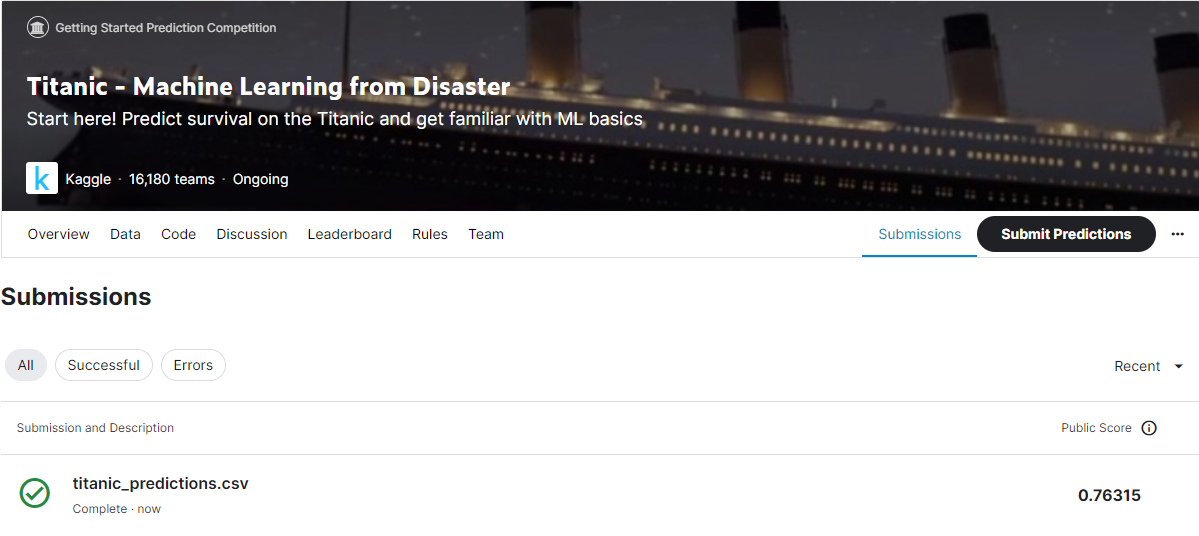

source: https://www.kaggle.com/c/titanic